In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [5]:
# 设置中文字体为宋体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置英文字体为新罗马
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 8  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False 

In [6]:
def data_prepare(file):
    df = pd.read_csv(file, encoding='gbk', parse_dates=['销售日期'])
    df['销售日期'] = pd.to_datetime(df['销售日期'])
    df = df.resample('M', on='销售日期').sum()
    df['日期'] = df.index
    return df

df1 = data_prepare("data_1\\按单品划分附件2\\蔡甸藜蒿.csv").drop("销售单价(元/千克)", axis=1)
df2 = data_prepare("data_1\\按单品划分附件2\\青杭椒(2).csv").drop("销售单价(元/千克)", axis=1)
df3 = data_prepare("data_1\\按单品划分附件2\\苋菜.csv").drop("销售单价(元/千克)", axis=1)
df4 = data_prepare("data_1\\按单品划分附件2\\长线茄.csv").drop("销售单价(元/千克)", axis=1)
df5 = data_prepare("data_1\\按单品划分附件2\\枝江红菜苔.csv").drop("销售单价(元/千克)", axis=1)
df6 = data_prepare("data_1\\按单品划分附件2\\组合椒系列.csv").drop("销售单价(元/千克)", axis=1)

name = ["蔡甸藜蒿", "青杭椒(2)", "苋菜", "长线茄", "枝江红菜苔", "组合椒系列"]

C:\Users\jack\AppData\Local\Temp\ipykernel_18960\4258455625.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M', on='销售日期').sum()
C:\Users\jack\AppData\Local\Temp\ipykernel_18960\4258455625.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M', on='销售日期').sum()
C:\Users\jack\AppData\Local\Temp\ipykernel_18960\4258455625.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.re

In [7]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df.head()

,销量(千克),日期,销量(千克),日期,销量(千克),日期,销量(千克),日期,销量(千克),日期,销量(千克),日期
销售日期,,,,,,,,,,,,
2020-07-31,NaN,NaT,NaN,NaT,143.737,2020-07-31,NaN,NaT,NaN,NaT,NaN,NaT
2020-08-31,NaN,NaT,NaN,NaT,236.180,2020-08-31,NaN,NaT,NaN,NaT,NaN,NaT
2020-09-30,5.324,2020-09-30,8.052,2020-09-30,139.108,2020-09-30,NaN,NaT,NaN,NaT,NaN,NaT
2020-10-31,34.796,2020-10-31,0.000,2020-10-31,0.000,2020-10-31,NaN,NaT,14.404,2020-10-31,NaN,NaT
2020-11-30,55.810,2020-11-30,0.000,2020-11-30,0.000,2020-11-30,NaN,NaT,193.102,2020-11-30,NaN,NaT


In [8]:
df.columns = ["蔡甸藜蒿", "日期", "青杭椒(2)", "日期",  "苋菜", "日期",  "长线茄", "日期",  "枝江红菜苔", "日期",  "组合椒系列", "日期"]
df.head()

,蔡甸藜蒿,日期,青杭椒(2),日期,苋菜,日期,长线茄,日期,枝江红菜苔,日期,组合椒系列,日期
销售日期,,,,,,,,,,,,
2020-07-31,NaN,NaT,NaN,NaT,143.737,2020-07-31,NaN,NaT,NaN,NaT,NaN,NaT
2020-08-31,NaN,NaT,NaN,NaT,236.180,2020-08-31,NaN,NaT,NaN,NaT,NaN,NaT
2020-09-30,5.324,2020-09-30,8.052,2020-09-30,139.108,2020-09-30,NaN,NaT,NaN,NaT,NaN,NaT
2020-10-31,34.796,2020-10-31,0.000,2020-10-31,0.000,2020-10-31,NaN,NaT,14.404,2020-10-31,NaN,NaT
2020-11-30,55.810,2020-11-30,0.000,2020-11-30,0.000,2020-11-30,NaN,NaT,193.102,2020-11-30,NaN,NaT


In [9]:
for i in name: 
    df[i].fillna(0, inplace=True)

In [10]:
df_final = pd.DataFrame(np.array(df[name]))
df_final.columns = name
df_final = df_final.astype("float")

In [11]:
correlation = df_final.corr("spearman")
correlation.head()

,蔡甸藜蒿,青杭椒(2),苋菜,长线茄,枝江红菜苔,组合椒系列
蔡甸藜蒿,1.000000,0.019812,-0.033454,-0.222881,0.190867,0.192897
青杭椒(2),0.019812,1.000000,0.351016,0.290310,-0.246133,0.671459
苋菜,-0.033454,0.351016,1.000000,0.289761,-0.764979,0.296185
长线茄,-0.222881,0.290310,0.289761,1.000000,-0.224470,0.041373
枝江红菜苔,0.190867,-0.246133,-0.764979,-0.224470,1.000000,-0.093991


In [12]:
def p_spearman(data):
    # 计算Spearman相关性检验的p值矩阵
    corr_matrix = np.zeros((len(data.columns), len(data.columns)))

    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i == j:
                continue
            rho, p_value = spearmanr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i, j] = p_value

    # 将p值矩阵转换为数据框，以便使用seaborn绘制热力图
    p_value_matrix = pd.DataFrame(corr_matrix, index=data.columns, columns=data.columns)

    return p_value_matrix

p_values_matrix = p_spearman(df_final)

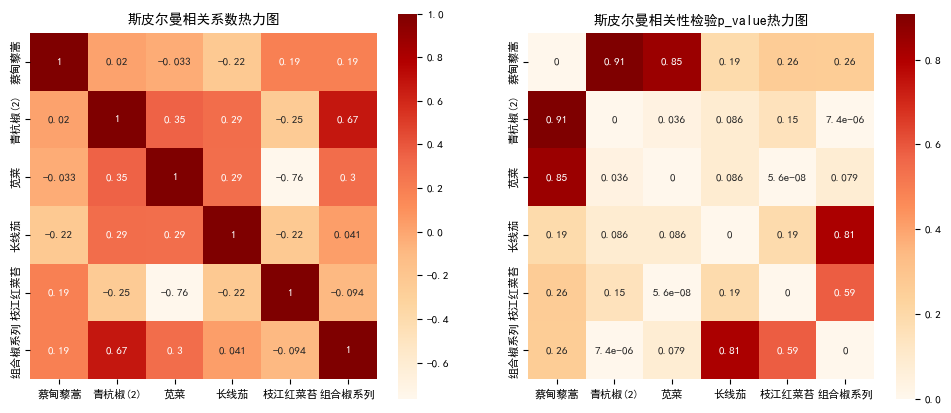

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.15, hspace=0.2)               # 同一列元素之间距离

sns.heatmap(data=correlation, annot=True, cmap="OrRd", square=True, 
            xticklabels=correlation.columns, yticklabels=correlation.columns, ax=ax[0])
sns.heatmap(data=p_values_matrix, annot=True, cmap="OrRd", square=True,
            xticklabels=correlation.columns, yticklabels=correlation.columns, ax=ax[1])

ax[0].set_title("斯皮尔曼相关系数热力图", fontsize=10)
ax[1].set_title("斯皮尔曼相关性检验p_value热力图", fontsize=10)

plt.savefig('绘图文件夹\\正文图7.eps')

C:\Users\jack\AppData\Local\Temp\ipykernel_18960\2388117489.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M', on='销售日期').sum()
C:\Users\jack\AppData\Local\Temp\ipykernel_18960\2388117489.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M', on='销售日期').sum()
C:\Users\jack\AppData\Local\Temp\ipykernel_18960\2388117489.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df

KeyboardInterrupt: 

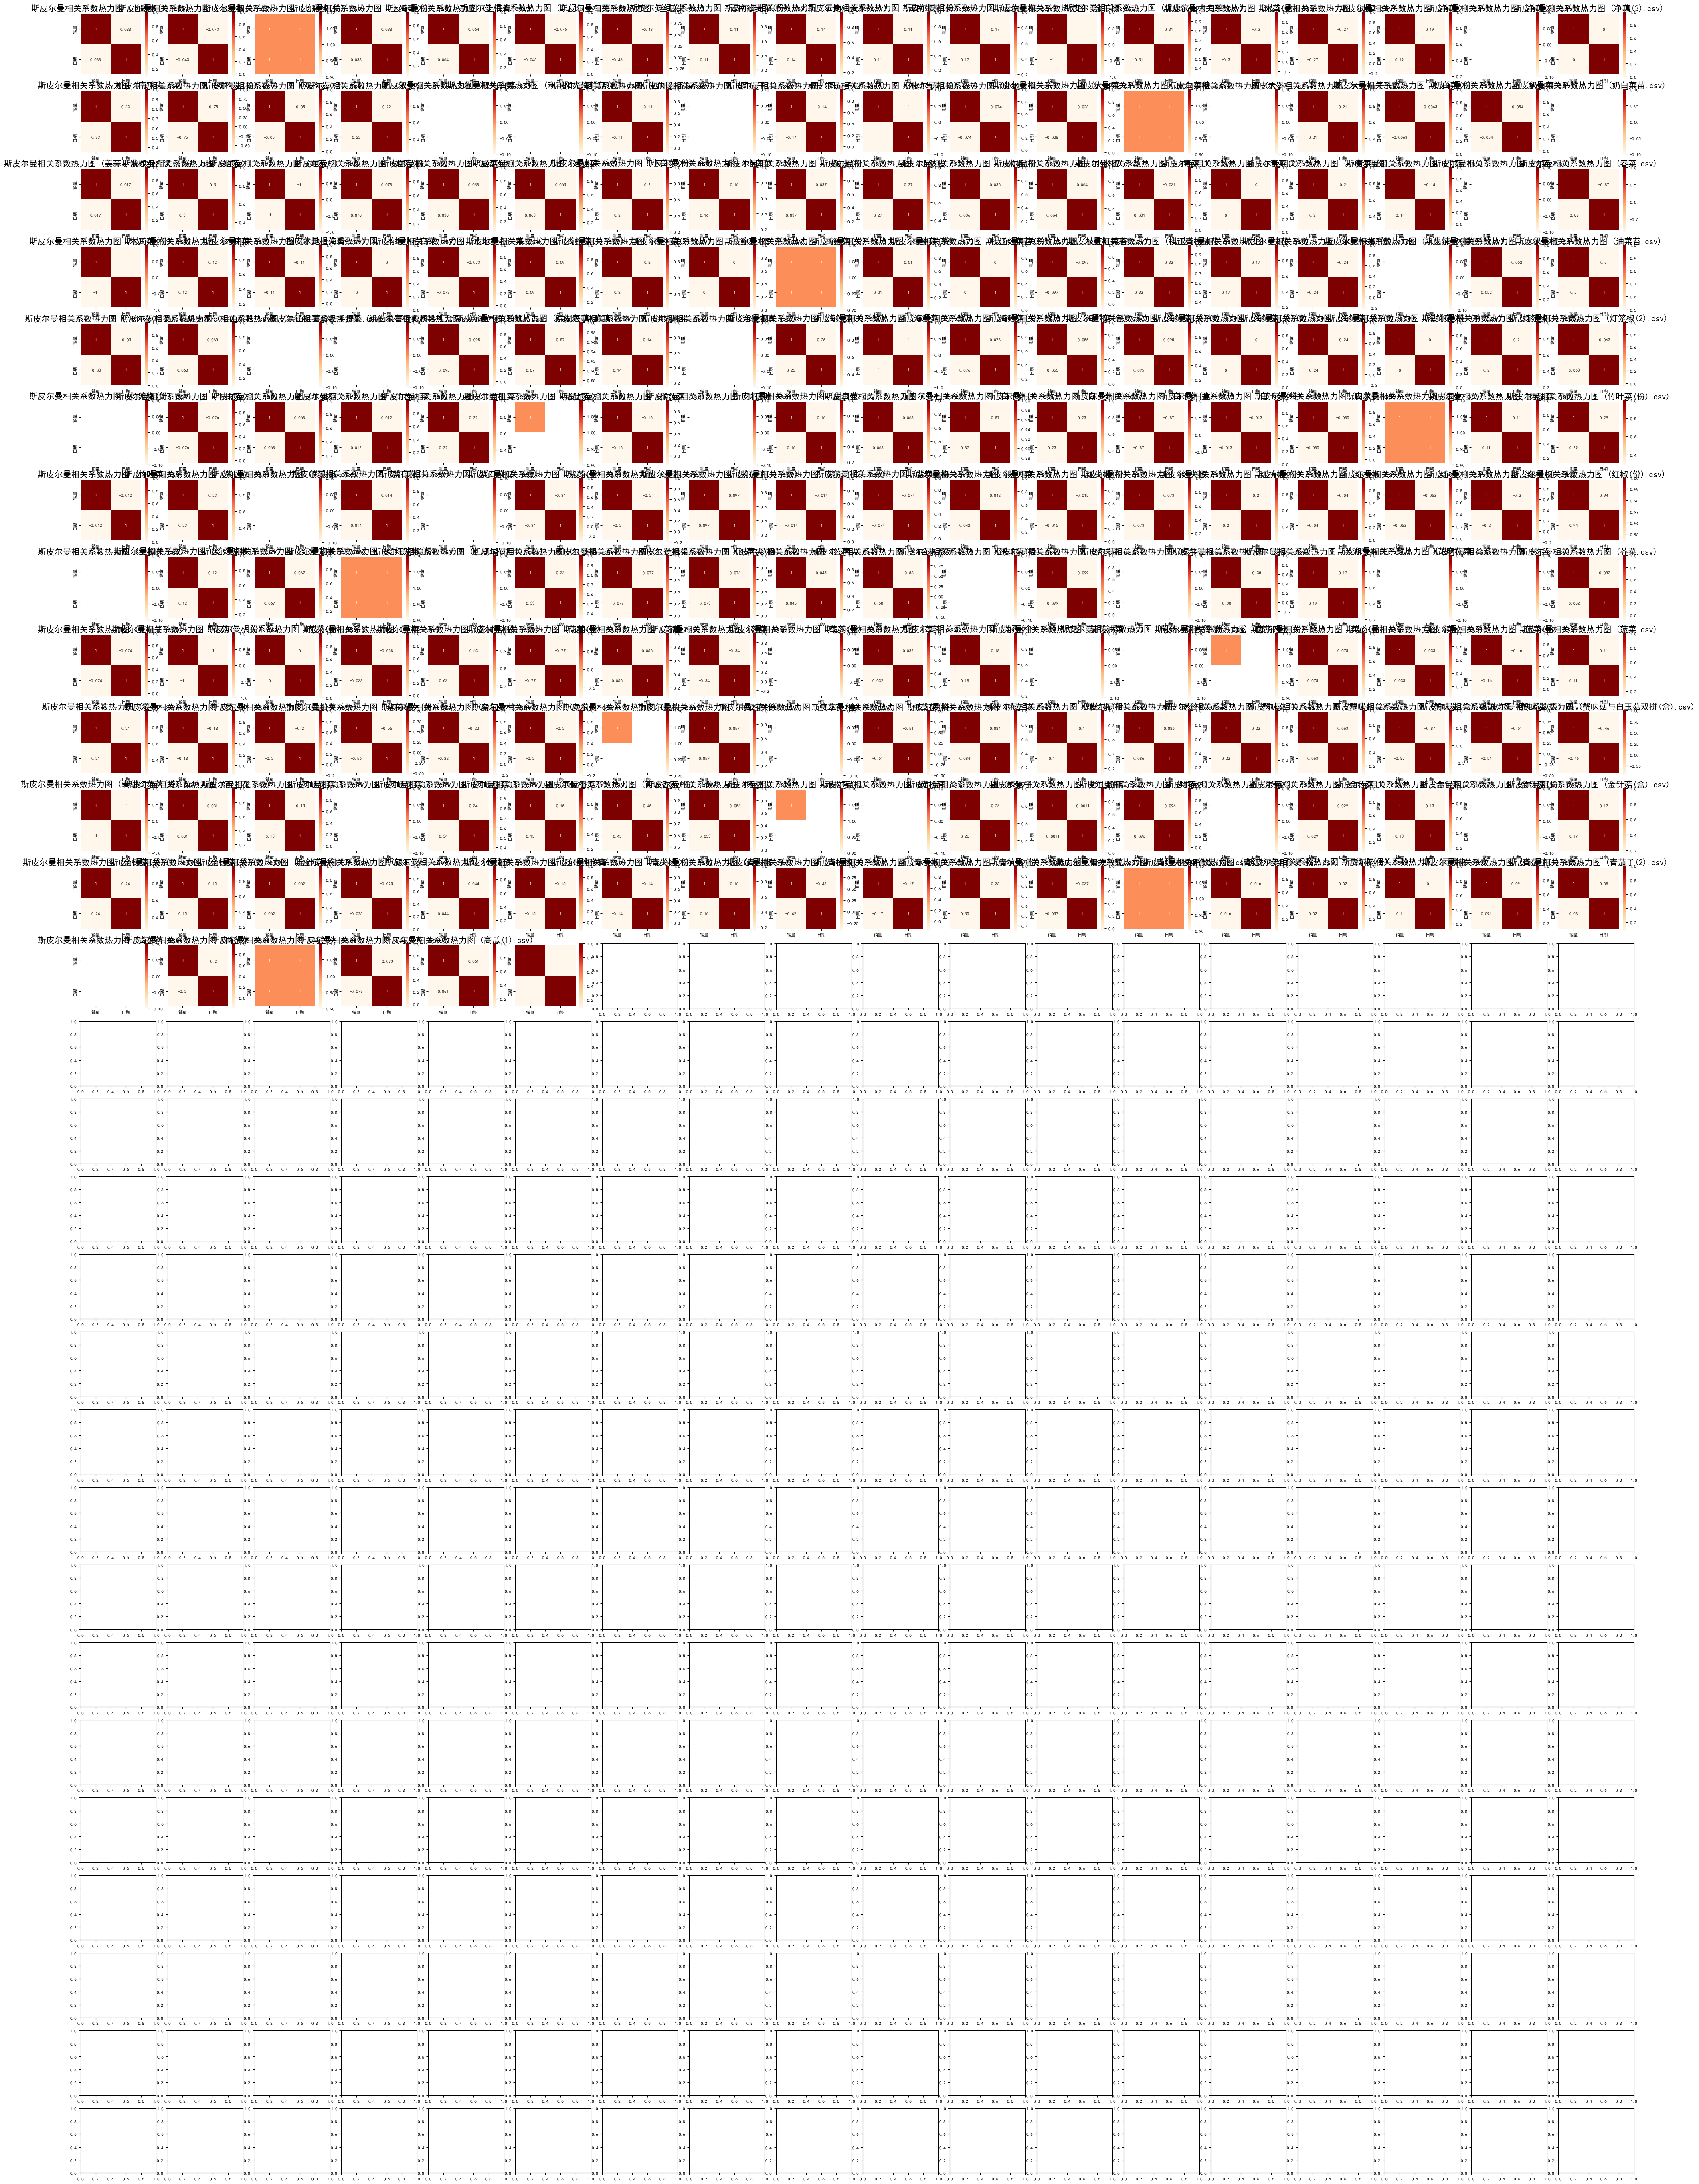

In [23]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 定义数据准备函数
def data_prepare(file):
    df = pd.read_csv(file, encoding='gbk')
    df['销售日期'] = pd.to_datetime(df['销售日期'])
    df = df.resample('M', on='销售日期').sum()
    df['销售日期'] = df.index
    name = df.columns
    df1 = pd.DataFrame(np.array(df))
    df1.columns = name
    df1['销售日期'] = df1['销售日期'].dt.day  # 使用日期的天数表示

    return df1

# 定义Spearman相关性检验的p值计算函数
def p_spearman(data):
    corr_matrix = np.zeros((len(data.columns), len(data.columns)))

    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i == j:
                continue
            rho, p_value = spearmanr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i, j] = p_value

    p_value_matrix = pd.DataFrame(corr_matrix, index=data.columns, columns=data.columns)

    return p_value_matrix

# 指定表格所在的文件夹路径
folder_path = "data_1\\按单品划分附件2"

# 创建一个大图，包含多个子图
num_files = len([filename for filename in os.listdir(folder_path) if filename.endswith(".csv")])
num_rows = 28
fig, axes = plt.subplots(nrows=num_rows, ncols=18, figsize=(50, 70))
fig.subplots_adjust(wspace=0.15, hspace=0.2)

# 遍历文件夹中的所有表格文件
row, col = 0, 0
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = data_prepare(file_path).drop("销售单价(元/千克)", axis=1)
        df.columns = ["销量", "日期"]
        df = df.astype("float")

        correlation = df.corr("spearman")
        p_values_matrix = p_spearman(df)

        # 在子图中画相关性热力图
        sns.heatmap(data=correlation, annot=True, cmap="OrRd", square=True,
                    xticklabels=correlation.columns, yticklabels=correlation.columns, ax=axes[row, col])
        axes[row, col].set_title(f"斯皮尔曼相关系数热力图 ({filename})", fontsize=15)

        col += 1
        if col == 18:
            col = 0
            row += 1

# 隐藏多余的子图
for r in range(row, num_rows):
    for c in range(2):
        axes[r, c].axis('off')

# 可以根据需要保存图片，也可以直接显示
# plt.savefig('绘图文件夹\\正文图4.eps')
plt.show()
